In [427]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_context("paper")
sns.set_style("whitegrid", {'axes.grid' : False})


def rename_columns(col):
    try:
        col = col.split('rank')[1].split(' ')[0]
    except:
        pass
    return col

def preprocess_df(path, drop_columns=[], alpha=0.99, take_every=10, max_len=1001):
    df = pd.read_csv(path)
    df_cr_self = df.iloc[:max_len:take_every,::2]
    df_cr_other = df.iloc[:max_len:take_every,1::2]
    
    df_cr_self.columns = list(map(rename_columns, df_cr_self.columns))
    df_cr_other.columns = list(map(rename_columns, df_cr_other.columns))
    
    df_cr_self = df_cr_self.drop(labels=drop_columns, axis=1)
    df_cr_other = df_cr_other.drop(labels=drop_columns, axis=1);
    
    df_cr_self = df_cr_self.apply(pd.to_numeric)
    df_cr_other = df_cr_other.apply(pd.to_numeric)
    
    df_cr_self = df_cr_self.ewm(alpha=alpha, adjust=False).mean()
    df_cr_other = df_cr_other.ewm(alpha=alpha, adjust=False).mean()
    
    df_cr_self = df_cr_self.melt(id_vars=["Step"], var_name="Rank", value_name="rate")
    df_cr_other = df_cr_other.melt(var_name="Rank", value_name="rate")
    df_cr_other["Step"] =  df_cr_self.iloc[:, 0]
    df_cr_other.columns.values[1] = "other"
    df_cr_self.columns.values[2] = "self"
    df_cr_self['other'] = df_cr_other.iloc[:, 1]
    molten = df_cr_self.melt(id_vars=["Step", "Rank"], value_name='Rate', var_name="Type")
    return molten

def produce_plot(path='tac_col_rate_self_other.csv',
                 figname="bro.pdf",
                 drop_columns=[],
                 alpha=0.99,
                 ax=None,
                 leg=False,
                 title=None,
                take_every=10,
                max_len=1001):
    
    melted = preprocess_df(path, drop_columns=drop_columns, alpha=alpha, take_every=take_every, max_len=max_len)
    sns.set_context("paper")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.lineplot(data=melted,
                 x="Step",
                 y='Rate',
                 hue='Type',
                 ax=ax,
                 legend=leg,).set_title(title)


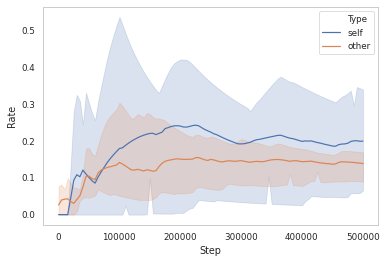

In [406]:
produce_plot('prop_col_rate_self_other.csv', figname='t2.pdf', leg='full')

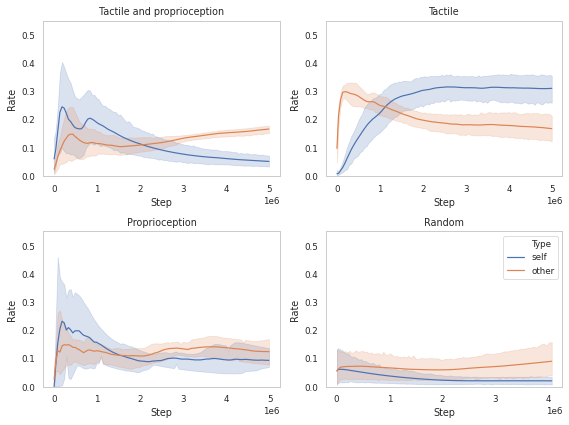

In [435]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 6));
axs = axs.flatten()
for ax in axs: ax.set_ylim(0, 0.55)

alpha = 0.75

produce_plot('tacprop_col_rate_self_other.csv',
             drop_columns=['2', '4'],
             figname='tpm.pdf',
             ax=axs[0],
             leg=False,
             alpha=alpha,
             title="Tactile and proprioception"
            )
produce_plot('tac_col_rate_self_other.csv',
             drop_columns=['1'],
             figname='tpm.pdf',
             ax=axs[1], leg=False,
             alpha=alpha,
             title="Tactile"
            )
produce_plot('prop_col_rate_self_other.csv',
             drop_columns=[],
             figname='tpm.pdf',
             ax=axs[2],
             leg=False,
             alpha=alpha,
             take_every=100,
             max_len=10001,
             title="Proprioception"
            )
produce_plot('rnd_col_rate_self_other.csv',
             drop_columns=['9', '1'],
             figname='tpm.pdf',
             ax=axs[3],
             leg="brief",
             alpha=0.05,
             title="Random"
            )
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x')
fig.savefig('fullall.pdf')